In [68]:
from sklearn.datasets import make_moons
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import pandas as pd

In [75]:
X, y = make_moons(n_samples=200, noise=0.07, random_state=42)

In [76]:
df = pd.DataFrame()
df['x'] = X[:, 0]
df['y'] = X[:, 1]
df['label'] = y

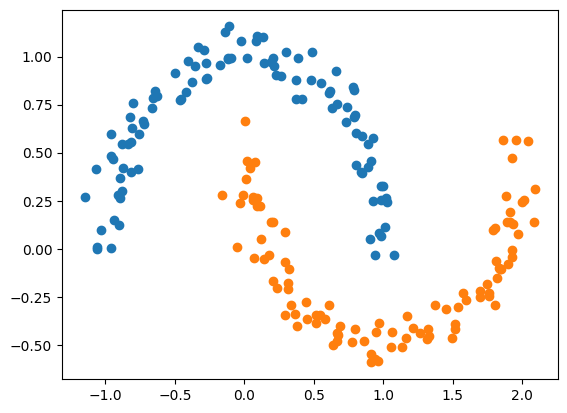

In [77]:
for l in df.label.unique():
    vals = df[df['label'] == l]
    plt.scatter(vals.x, vals.y)

plt.show()

## Encontrar epson ideal

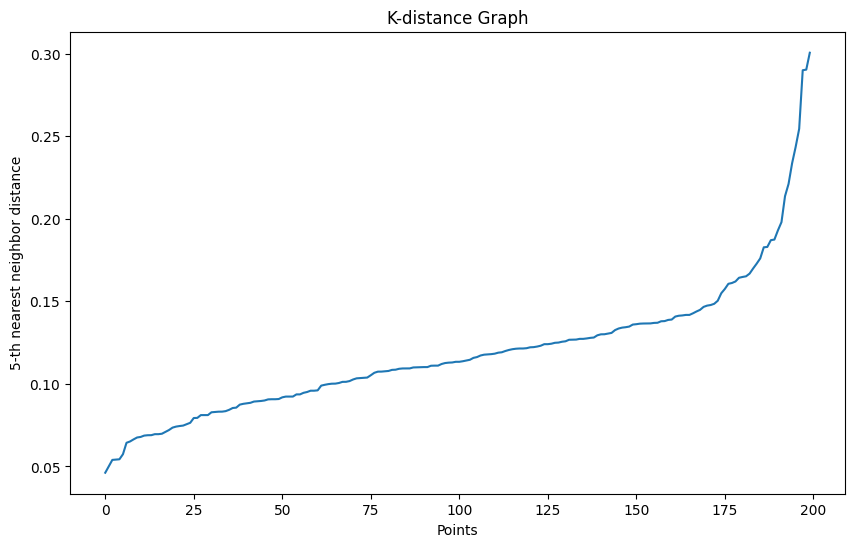

In [78]:
def plot_k_distance_graph(X, k):
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(X)

    distances, _ = neigh.kneighbors(X)
    distances = np.sort(distances[:, k-1])
    
    plt.figure(figsize=(10, 6))
    plt.plot(distances)
    plt.xlabel('Points')
    plt.ylabel(f'{k}-th nearest neighbor distance')
    plt.title('K-distance Graph')
    plt.show()

plot_k_distance_graph(X, k=5)

um valor além do cotovelo indica que os dados ficam esparsos demais (ruído). O objetivo é calcular a "desidade média" e se basear nisso para definir os parâmetros. É mais uma arte que uma ciência.

In [79]:
dbscan = DBSCAN(eps=0.17, min_samples=5)
df['dbscan'] = dbscan.fit_predict(X)

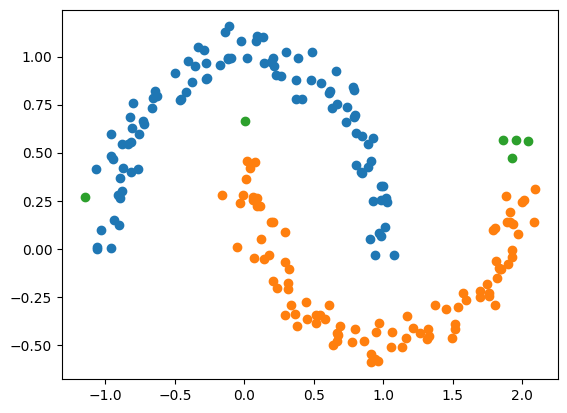

In [80]:
for l in df.dbscan.unique():
    vals = df[df['dbscan'] == l]
    plt.scatter(vals.x, vals.y)

plt.show()